In [3]:
import numpy as np
import pandas as pd

Kaggle Dataset. Link : https://www.kaggle.com/datasets/ayoreynolds/capstone-hr-projects

In [4]:
df=pd.read_csv("/content/HR_capstone_dataset.csv")

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
df.shape

(14999, 10)

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,object
salary,object


In [9]:
df["left"].value_counts()

,count
left,
0,11428
1,3571


In [10]:
print("\nTarget Distribution:")
print(df['left'].value_counts())
print("\nTarget Percentage:")
print(df['left'].value_counts(normalize=True)*100)


Target Distribution:
left
0    11428
1     3571
Name: count, dtype: int64

Target Percentage:
left
0    76.191746
1    23.808254
Name: proportion, dtype: float64


Majority of the employees did not leave the company.

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')
Index(['Department', 'salary'], dtype='object')


### Data Preprocessing

Missing Values

In [12]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


No null values

In [13]:
df.duplicated().sum()

np.int64(3008)

In [14]:
df=df.drop_duplicates()

In [15]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


found and removed the duplicate values

In [16]:
def outlier_detection(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  return lower,upper

# Exclude 'left' column from outlier detection
feature_numerical_cols = [col for col in numerical_cols if col != 'left']

for col in feature_numerical_cols:
  lower,upper = outlier_detection(df,col)
  df[col] = np.where(df[col]<lower, lower, df[col])
  df[col] = np.where(df[col]>upper, upper, df[col])

/tmp/ipython-input-1714569102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col]<lower, lower, df[col])
/tmp/ipython-input-1714569102.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col]>upper, upper, df[col])
/tmp/ipython-input-1714569102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Categorical encoding for salary column

In [17]:
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['salary'] = df['salary'].map(salary_mapping)

/tmp/ipython-input-2591113203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].map(salary_mapping)


mapped the salary to numerical values based on the range

In [18]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1,0.0,sales,0
1,0.80,0.86,5.0,262.0,5.5,0.0,1,0.0,sales,1
2,0.11,0.88,7.0,272.0,4.0,0.0,1,0.0,sales,1
3,0.72,0.87,5.0,223.0,5.0,0.0,1,0.0,sales,0
4,0.37,0.52,2.0,159.0,3.0,0.0,1,0.0,sales,0
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3.0,259.0,5.5,0.0,0,0.0,management,2
11996,0.74,0.95,5.0,266.0,5.5,0.0,0,0.0,management,2
11997,0.85,0.54,3.0,185.0,5.5,0.0,0,0.0,management,2
11998,0.33,0.65,3.0,172.0,5.5,0.0,0,0.0,marketing,2


In [19]:
df['Department'].value_counts()

,count
Department,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


One hot encoding for department column

In [20]:
#df = pd.get_dummies(df, columns=['Department'], drop_first=True)

Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

x = df.drop('left', axis=1)
y = df['left']

# Apply one-hot encoding to the 'Department' column before scaling
x = pd.get_dummies(x, columns=['Department'], drop_first=True)

x_scaled = scaler.fit_transform(x)

Logistic Regression is scale-sensitive.

### EDA

1. Target Distribution : If minority class small → imbalance problem

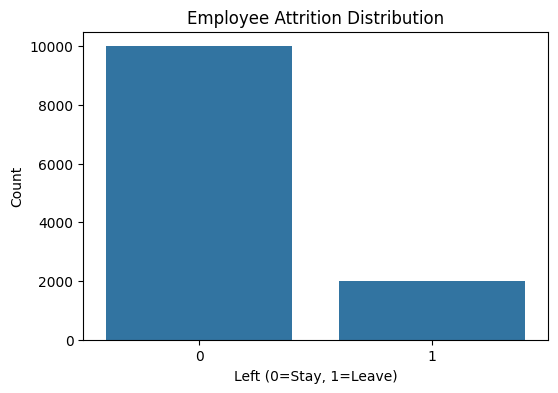

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='left', data=df)
plt.title("Employee Attrition Distribution")
plt.xlabel("Left (0=Stay, 1=Leave)")
plt.ylabel("Count")
plt.show()

2. Distribution Plots :

Low satisfaction → likely to leave.

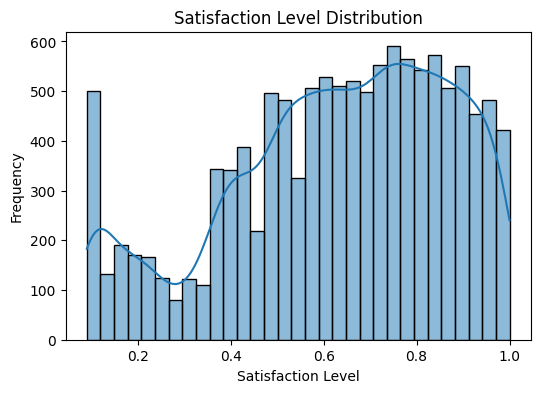

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df['satisfaction_level'], kde=True)
plt.title("Satisfaction Level Distribution")
plt.xlabel("Satisfaction Level")
plt.ylabel("Frequency")
plt.show()

3. Salary vs Attrition : Low salary employees leave more.

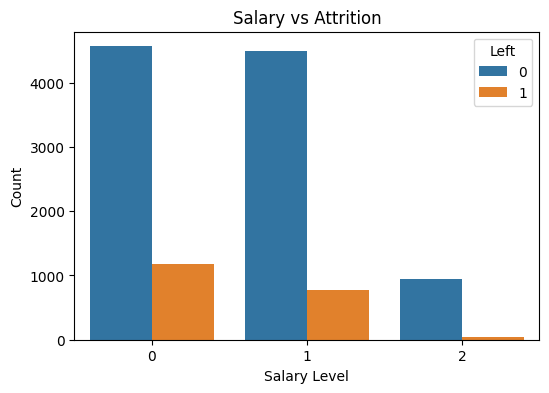

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='salary', hue='left', data=df)
plt.title("Salary vs Attrition")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left")
plt.show()

4. Boxplot for Workload : High workload → burnout → attrition.

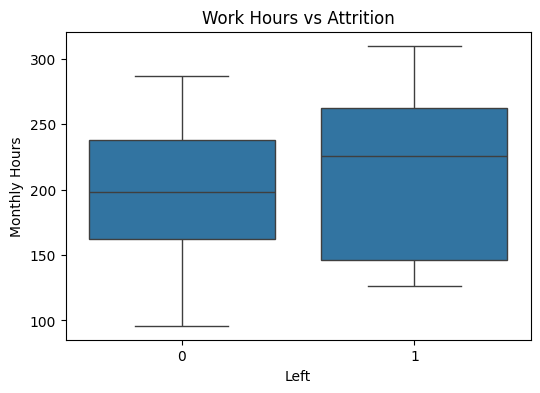

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title("Work Hours vs Attrition")
plt.xlabel("Left")
plt.ylabel("Monthly Hours")
plt.show()

5. Correlation Heatmap

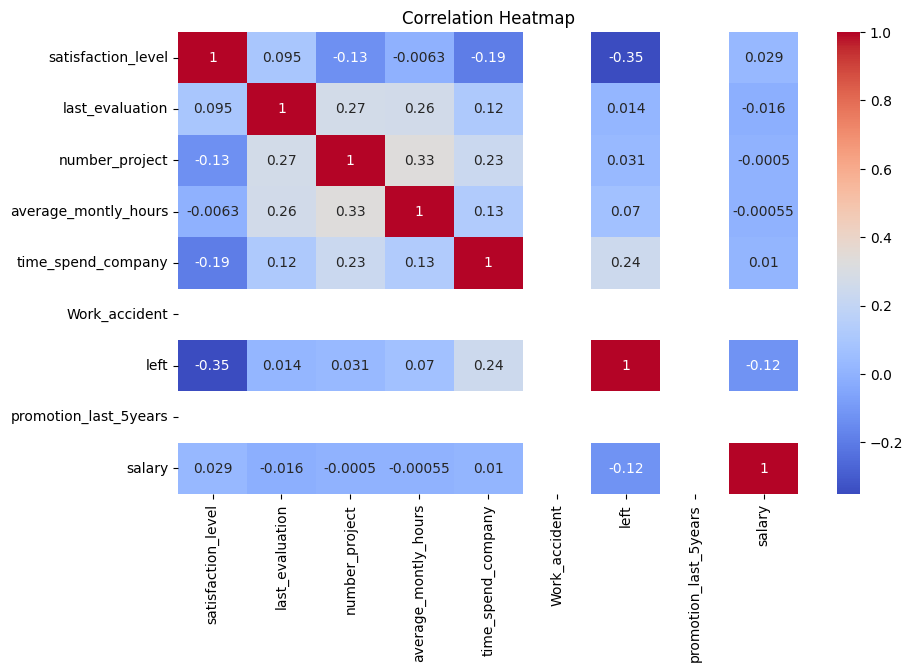

In [26]:
plt.figure(figsize=(10,6))
# Create a temporary DataFrame with one-hot encoded 'Department' for correlation
df_encoded_for_corr = pd.get_dummies(df, columns=['Department'], drop_first=True)

# Select only numeric columns from the encoded DataFrame for correlation calculation
numeric_df_for_corr = df_encoded_for_corr.select_dtypes(include=np.number)

sns.heatmap(numeric_df_for_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Model Building

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


[[1900  101]
 [ 330   68]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2001
           1       0.40      0.17      0.24       398

    accuracy                           0.82      2399
   macro avg       0.63      0.56      0.57      2399
weighted avg       0.78      0.82      0.79      2399

ROC-AUC: 0.8474142325822014
